<a href="https://colab.research.google.com/github/mstulir/ML_project/blob/main/mlfinalcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 15 - Breast Cancer Detection using Machine Learning Methods

### Sarah Baalbaki, William Hsu, Ethan Gaskin, Madison Stulir



This notebook contains three sections, one for each of the methods we implemented. The Naive Bayes and Random Forest were implemented by us, and as for SVM we used the sklearn package.


Our dataset was cleaned and prepared as a separate file, which we have saved as data_final.csv. It contains 567 rows (samples), and 11 columns. The first 10 columns are the features, and the last column is the label diagnosis: B for benign or M for malignant.

## SVM Code

Import the needed libraries and packages

In [ ]:
from sklearn.model_selection import cross_validate
import numpy as np
import copy as cp
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score

import seaborn as sns
from typing import Tuple
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.svm import SVC

import numpy as np
import pandas as pd
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from google.colab import drive
import os
from typing import List, Tuple
from numpy import genfromtxt

Mount drive and set file path

In [ ]:
# mount your google drive
drive.mount('/content/drive/')
filepath= "/content/drive/MyDrive/ML-project/data_final.csv"
#change directory
os.chdir("/content/drive/MyDrive/ML-project/")
# filepath= "/content/drive/MyDrive/ML-project/data_final.csv"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Functions Needed for Implementation

In [ ]:
# function to convert the labels to numberical
# 0: benign and 1: Malignant
convert = lambda x: 0 if x == b'B' else 1 # b'someString' is a byte

# apply the function on the last row of the dataset to conver the diagnosis
dataset = genfromtxt(filepath, delimiter=',',converters={-1:convert})

In [ ]:
# load the data
def get_X_y(dataset):
  X=dataset[:,:-1]
  y=dataset[:,-1]
  return X,y

X,y = get_X_y(dataset)

In [ ]:
#https://towardsdatascience.com/how-to-plot-a-confusion-matrix-from-a-k-fold-cross-validation-b607317e9874
#This method was not implemented from scratch. We have modified code from the above tutorial as well as used sklearn SVM

def cross_val_predict(model, kfold : KFold, X, y) -> Tuple[np.array, np.array, np.array]:

    model_ = cp.deepcopy(model)

    no_classes = len(np.unique(y))

    actual_classes = np.empty([0], dtype=int)
    predicted_classes = np.empty([0], dtype=int)
    predicted_proba = np.empty([0, no_classes])

    for train_ndx, test_ndx in kfold.split(X):

        train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]

        actual_classes = np.append(actual_classes, test_y)

        model_.fit(train_X, train_y)
        predicted_classes = np.append(predicted_classes, model_.predict(test_X))

        try:
            predicted_proba = np.append(predicted_proba, model_.predict_proba(test_X), axis=0)
        except:
            predicted_proba = np.append(predicted_proba, np.zeros((len(test_X), no_classes), dtype=float), axis=0)

    return actual_classes, predicted_classes, predicted_proba

In [ ]:
# function to plot the confusion matrix
def plot_confusion_matrix(actual_classes : np.array, predicted_classes : np.array, sorted_labels : list):

    matrix = confusion_matrix(actual_classes, predicted_classes, labels=sorted_labels)
    matrix= matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(12.8,6))
    sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="RdPu", fmt="g")
    plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')

    plt.show()

Running the Code

### Linear

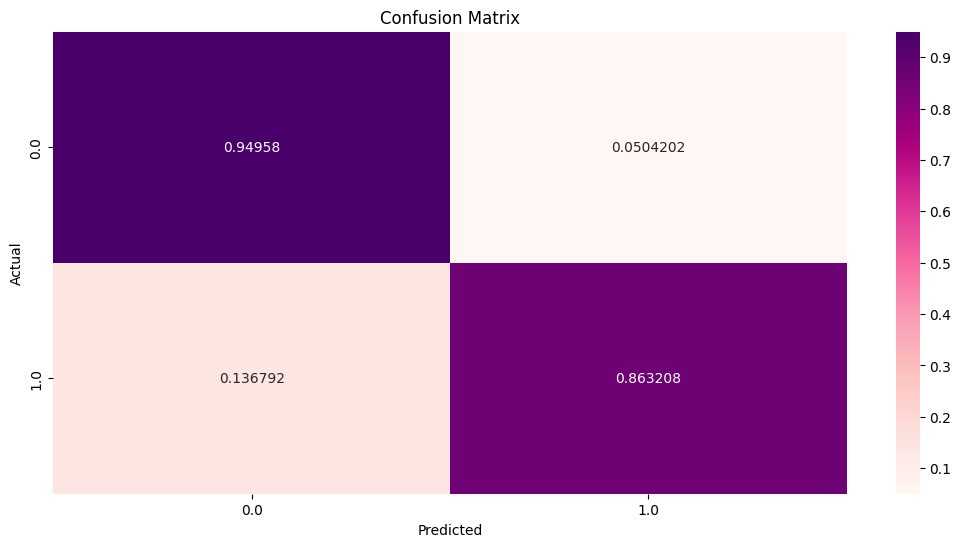

F1:  0.8861985472154963
test accuracy:  0.9173989455184535


In [ ]:
model = clf = SVC(kernel='linear', C = 1.0)
kfold=KFold(n_splits=5, random_state=42, shuffle=True)
actual_classes, predicted_classes, _ = cross_val_predict(model, kfold, X, y)
#print(actual_classes)
#print(predicted_classes)
plot_confusion_matrix(actual_classes, predicted_classes, [0., 1.])
print("F1: ",f1_score(actual_classes, predicted_classes))
print("test accuracy: ", accuracy_score(actual_classes, predicted_classes))

In [ ]:
cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy', verbose=10)

print(cv_results.mean(), cv_results.std())

[CV] START .....................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.939) total time=   0.9s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] END ................................ score: (test=0.947) total time=   1.6s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


[CV] END ................................ score: (test=0.912) total time=   2.1s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.6s remaining:    0.0s


[CV] END ................................ score: (test=0.921) total time=   3.6s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    8.3s remaining:    0.0s


[CV] END ................................ score: (test=0.867) total time=   1.5s
0.9173109765564351 0.02793300428872059


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.8s finished


In [ ]:
print("mean accuracy: ", cv_results.mean(), "sd: ", cv_results.std())

mean accuracy:  0.9173109765564351 sd:  0.02793300428872059


In [ ]:
cv_results_2 = cross_validate(model, X, y, cv=kfold, scoring=('accuracy', 'f1'), return_train_score=True)
cv_results_2

{'fit_time': array([0.98093414, 1.5807023 , 1.48370361, 1.39266562, 1.06993151]),
 'score_time': array([0.00467134, 0.00435996, 0.00455999, 0.00510025, 0.00478458]),
 'test_accuracy': array([0.93859649, 0.94736842, 0.9122807 , 0.92105263, 0.86725664]),
 'train_accuracy': array([0.90989011, 0.91648352, 0.92087912, 0.92087912, 0.92982456]),
 'test_f1': array([0.91954023, 0.91891892, 0.88095238, 0.88888889, 0.82758621]),
 'train_f1': array([0.87461774, 0.88757396, 0.89156627, 0.89156627, 0.90184049])}

In [ ]:
print("Optimal Linear SVM results: ")
print("test accuracy: " ,cv_results_2['test_accuracy'].mean())
print("train accuracy: " ,cv_results_2['train_accuracy'].mean())
print("test f1: ", cv_results_2['test_f1'].mean())
print("train f1: ", cv_results_2['train_f1'].mean())

Optimal Linear SVM results: 
test accuracy:  0.9173109765564351
train accuracy:  0.9195912859070754
test f1:  0.8871773251083596
train f1:  0.8894329444836254


### Non-Linear

In [ ]:
#try an aribitrary parameter set
model_nonlin = SVC(kernel='rbf', gamma=0.001, C = 1)

cv_results_3 = cross_validate(model_nonlin, X, y, cv=kfold, scoring=('accuracy', 'f1'), return_train_score=True)

print("test accuracy: " ,cv_results_3['test_accuracy'].mean())
print("train accuracy: " ,cv_results_3['train_accuracy'].mean())
print("test f1: ", cv_results_3['test_f1'].mean())
print("train f1: ", cv_results_3['train_f1'].mean())

test accuracy:  0.894457382394038
train accuracy:  0.8941064198958936
test f1:  0.8439175209850316
train f1:  0.8432191687245132


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000, 10000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001,0.0000001,0.00000001 ]}

# Create a grid search object
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)

# Fit the grid search object to the training data
grid.fit(X, y)

# Get the best parameters
best_params = grid.best_params_

Fitting 5 folds for each of 63 candidates, totalling 315 fits
[CV] END ....................................C=0.01, gamma=1; total time=   0.0s
[CV] END ....................................C=0.01, gamma=1; total time=   0.0s
[CV] END ....................................C=0.01, gamma=1; total time=   0.0s
[CV] END ....................................C=0.01, gamma=1; total time=   0.0s
[CV] END ....................................C=0.01, gamma=1; total time=   0.0s
[CV] END ..................................C=0.01, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.01, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.01, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.01, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.01, gamma=0.1; total time=   0.0s
[CV] END .................................C=0.01, gamma=0.01; total time=   0.0s
[CV] END .................................C=0.0

In [ ]:
best_params

{'C': 1000, 'gamma': 0.0001}

In [ ]:
model_nonlin = SVC(kernel='rbf', C = 1000, gamma=0.0001)
kfold=KFold(n_splits=5, random_state=42, shuffle=True)

cv_results_3 = cross_validate(model_nonlin, X, y, cv=kfold, scoring=('accuracy', 'f1'), return_train_score=True)

print("Optimal Non linear SVM results:")
print("test accuracy: " ,cv_results_3['test_accuracy'].mean())
print("train accuracy: " ,cv_results_3['train_accuracy'].mean())
print("test f1: ", cv_results_3['test_f1'].mean())
print("train f1: ", cv_results_3['train_f1'].mean())

Optimal Non linear SVM results:
test accuracy:  0.9103244837758112
train accuracy:  0.9296963562753037
test f1:  0.8745258635236397
train f1:  0.9016609376399058


Plot Grid Results

In [ ]:
df = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
df

,C,gamma,Accuracy
0,0.01,1.000000e+00,0.627418
1,0.01,1.000000e-01,0.627418
2,0.01,1.000000e-02,0.627418
3,0.01,1.000000e-03,0.627418
4,0.01,1.000000e-04,0.627418
...,...,...,...
58,10000.00,1.000000e-04,0.905123
59,10000.00,1.000000e-05,0.898137
60,10000.00,1.000000e-06,0.892812
61,10000.00,1.000000e-07,0.891057


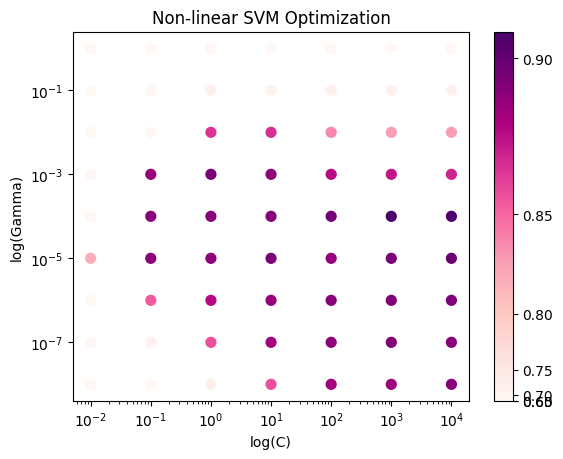

In [ ]:
import matplotlib.colors as colors

plt.scatter(df.C, df.gamma, s=50, norm=colors.PowerNorm(gamma=3), c=df.Accuracy, cmap='RdPu')
plt.xlabel("log(C)")
plt.ylabel("log(Gamma)")
plt.yscale("log")
plt.xscale("log")
plt.title('Non-linear SVM Optimization')
plt.colorbar()

### Data Visualization

In [ ]:
# Plot the pairwise plot of the data!

In [ ]:
df=pd.DataFrame(dataset, columns = ["radius", "texture", "perimeter", "area",	"smoothness", "compactness", "concavity", "concave points", "symmetry", "fractal_dimension", "diagnosis"])

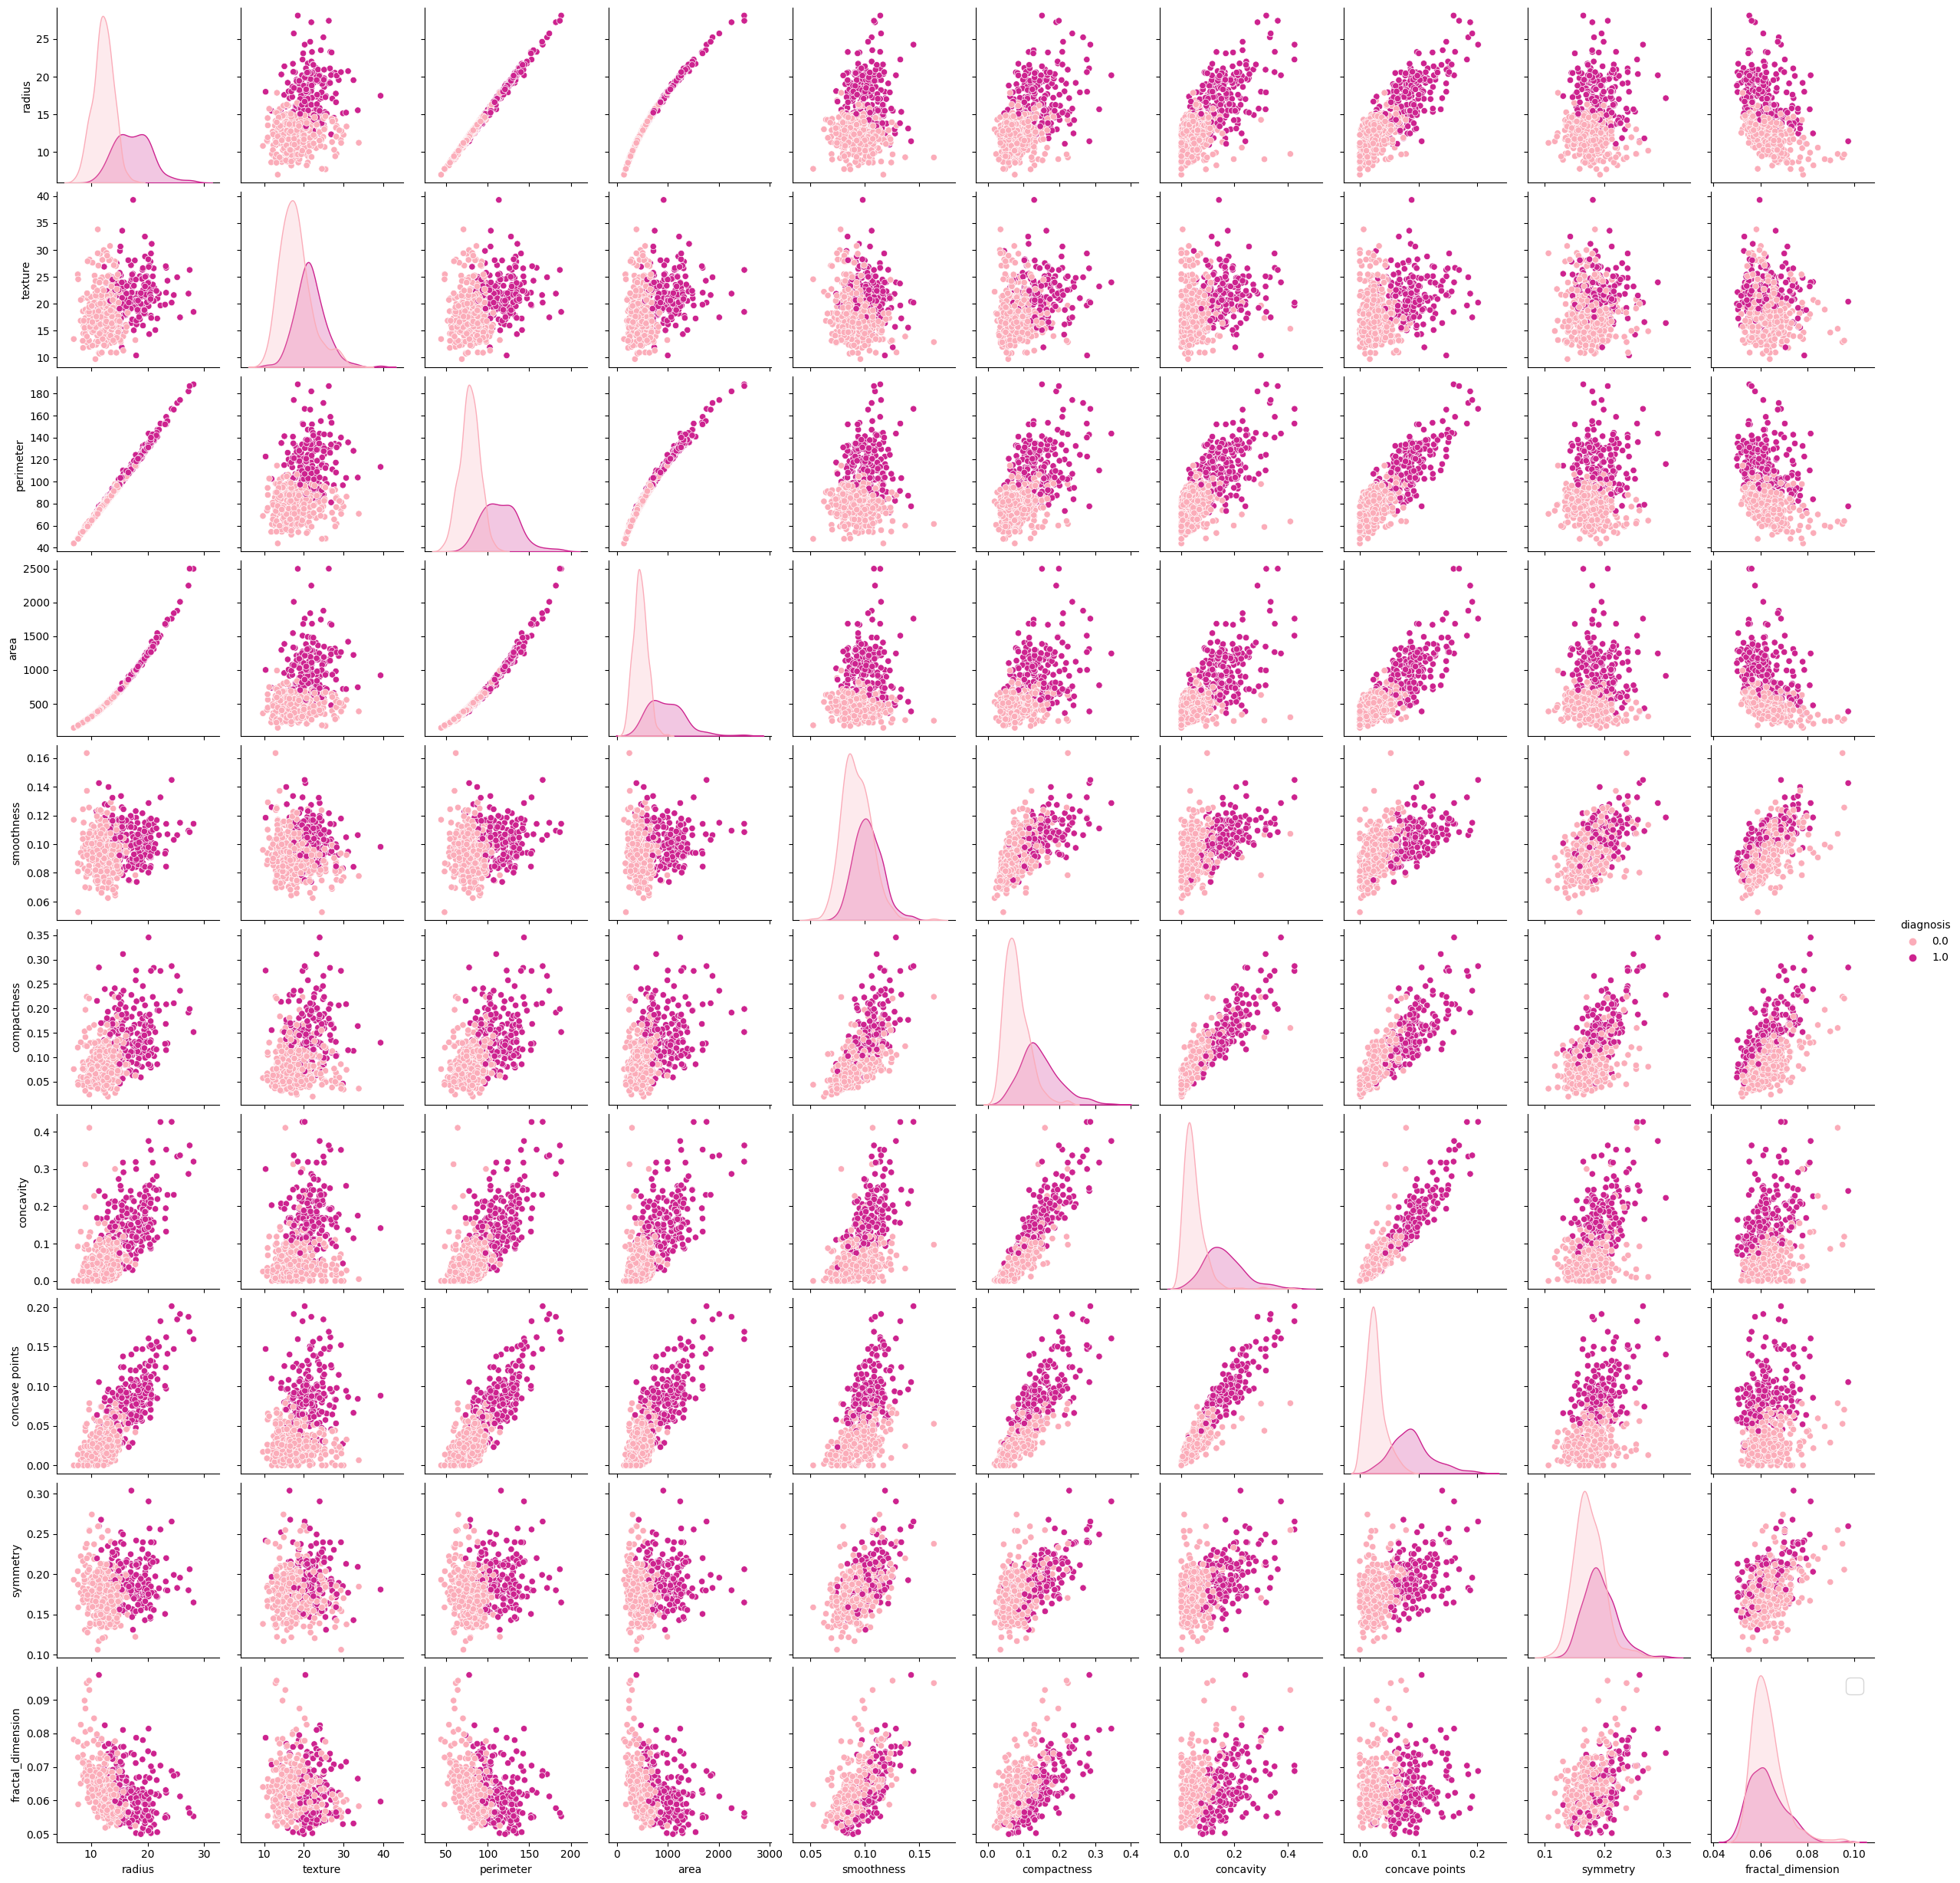

In [ ]:
ax = sns.pairplot(df, hue="diagnosis", palette="RdPu")
fontsize = 20
plt.legend(loc="upper right", frameon=True, fontsize=fontsize)

plt.show()

## Random Forest Code

This method was implemented from scratch. We have modified code from [this tutorial](https://machinelearningmastery.com/implement-random-forest-scratch-python/), adapating it to fit our project

Import the needed Libraries and packages

In [ ]:
import numpy as np
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn.metrics import confusion_matrix, f1_score
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import drive
import os
from random import sample

Mount Drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Set file path and change directory to our specified directory

In [ ]:
# filepath
filepath= "/content/drive/MyDrive/ML-project/data_final.csv"

#change directory
os.chdir("/content/drive/MyDrive/ML-project/")

Preparing the Dataset

In [ ]:
# function to load our csv data file
def load_csv_dataset(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

In [ ]:
# function to convert the string column entries to floats
def column_to_float(dataset, col):
	# loop over dataset
	for row in dataset:
		# convert the string to float
		row[col] = float(row[col].strip())

# function to convert the string column entries to integers
def column_to_int(dataset, col):
    # create set of all vals in the col
    values = set(row[col] for row in dataset)
    # create dictionary mapping each val to integer index
    value_map = {value: i for i, value in enumerate(values)}
    # iterate over each row in the dataset and replace the string value with its corresponding integer value
    for row in dataset:
        row[col] = value_map[row[col]]

Functions for Data Separation and Cross Validation

In [ ]:
# function to split the dataset into k specified folds
def cross_val_split(dataset, n_folds):
	dataset_split = list()
  # copy the dataset
	dataset_copy = list(dataset)
	fold_size = len(dataset) // n_folds
	for i in range(n_folds):
    # empty list to store the folds
		fold = list()
    # sample without replacement to get the datapoints in this fold
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
      # remove the samples from the dataset so they don't appear in other folds
			fold.append(dataset_copy.pop(index))
    # add the samples to the list of folds
		dataset_split.append(fold)
	# return the list of folds
	return dataset_split

In [ ]:
# function to split our dataset based on a feature and its corresaponding value
def test_split(index, val, dataset):
    # split dataset into left and right nodes
		# based on the specified feature and value
		left_split= [row for row in dataset if row[index] < val]
		right_split = [row for row in dataset if row[index] >= val]
		# return the left and right splits
		return left_split, right_split

In [ ]:
# function to create a random subsample from the dataset with replacement
def sub_sample(dataset, ratio):
    # get size of subsample
    n_sample = round(len(dataset) * ratio)
    # empty list to store subsample
    sample = []
    # loop through the dataset
    for i in range(n_sample):
        # select an index randomly
        index = randrange(len(dataset))
        # add the row to the subsample
        sample.append(dataset[index])

    return sample

Functions for Random Forest Construction

In [ ]:
# function to build the decision tree
def construct_tree(train, max_depth, min_size, n_features):
	# make the root
	root = create_split_point(train, n_features)
	# split the re4st of the dataset recursively to make the whole tree
	actual_split(root, max_depth, min_size, n_features, 1)
	return root

In [ ]:
# function to select the best split point
def create_split_point(dataset, n_features):
	# get list of unique class vals
	class_values = list(set(row[-1] for row in dataset))
	# variables to store the best split point found so far
	best_index, best_value, best_score, best_groups = 999, 999, 999, None
	features = []
	# list of features to consider for split
	while len(features) < n_features:
		index = randrange(len(dataset[0])-1)
		if index not in features:
			features.append(index)
	# loop through each feature and each row to find best split point
	for index in features:
		for row in dataset:
			# split dataset based on the current feature and row
			groups = test_split(index, row[index], dataset)
			# get the gini index of the split
			gini = gini_index(groups, class_values)
			# update the best split point if the current split has a lower gini index
			if gini < best_score:
				best_index, best_value, best_score, best_groups = index, row[index], gini, groups
	# return a dictionary with the best split point found
	return {'index': best_index, 'value': best_value, 'groups': best_groups}

In [ ]:
# function that creates child splits for a node or makes the node terminal
def actual_split(node, max_depth, min_size, n_features, depth):
	left, right = node['groups']
	del(node['groups'])
	# if no split, then the node is a terminal node
	if not left or not right:
		# make node left and righ terminal
		node['left'] = node['right'] = make_node_terminal(left + right)
		return
	# check for max depth
	# if more than max depth, stop expamding th etree and make the nodes terminal
	if depth >= max_depth:
		node['left'], node['right'] = make_node_terminal(left), make_node_terminal(right)
		return
	# if the length is less than the max depth, continue divoding the tree
	# left child
	# if size is less than min size needed for a node, make it terminal
	if len(left) <= min_size:
		node['left'] = make_node_terminal(left)
	else:
		# if size is large enough for datapoints under this node, choose an attribute to split on and split
		node['left'] = create_split_point(left, n_features)
		actual_split(node['left'], max_depth, min_size, n_features, depth+1)
	# right child
	# if size is less than min size needed for a node, make it terninal
	if len(right) <= min_size:
		node['right'] = make_node_terminal(right)
	else:
		# if size is large enough for datapoints under this node, choose an attribute to split on and split
		node['right'] = create_split_point(right, n_features)
		actual_split(node['right'], max_depth, min_size, n_features, depth+1)

In [ ]:
# function to create a terminal node value
def make_node_terminal(subset):
	# set the node label as the majoity label of the corresponding rows in the subset
	outcomes = [row[-1] for row in subset]
	return max(set(outcomes), key=outcomes.count)

In [ ]:
# function to calculate the gini index for the dataset
def gini_index(groups, classes):
	# get all samples at split point
	n_instances = float(sum([len(group) for group in groups]))
	# sum the weighted gini index for each group
	gini = 0.0
	# gor each group
	for g in groups:
		# get size of group
		size = float(len(g))
		# avoid divide by zero
		if size == 0:
			continue
		score = 0.0
		# get the score of the group based on the score for each class
		for val in classes:
			p = [row[-1] for row in g].count(val) / size
			score += p * p
		# weight the group score by its relative size
		gini += (1.0 - score) * (size / n_instances)
	# return the gini index
	return gini

Codes For Plotting, Visualization, and Calculating Performance  

In [ ]:
# function to make a prediction with a decision tree
def predict(node, row):
    # check if feature val of given row is less than the node split value
		# here, feature value less than node -> go to left
    if row[node['index']] < node['value']:
        # if left child of the node is a dictionary, we already have a subtree at this node
				# recursively call the predict function with the left child as the new node
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        # if not, no left subtree
				# return the predicted class label = value of the left child
        else:
            return node['left']
    # here, feature value greater than or equal to the split node -> go right
    else:
        # if right child of the node is a dictionary, we already have a subtree at this node
				# recursively call the predict function with the left child as the new node
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        # if not, no right subtree
				# return the predicted class label = value of the right child
        else:
            return node['right']

In [ ]:
# function to make a prediction with a list of bagged trees
def predict_bagging_result(trees, row):
    # list to store the different tree predictions
    predictions = []
    # make predictions for each tree in trees
    for tree in trees:
        prediction = predict(tree, row)
        predictions.append(prediction)
    # count the occurrence of each prediction (0 or 1)
    counts = [predictions.count(p) for p in set(predictions)]
    # get the index of the prediction with the max count
    max_index = counts.index(max(counts))
    # return the prediction with the max count
    return list(set(predictions))[max_index]

In [ ]:
# function to calculate the accuracy
def get_accuracy(real, pred):
	# variable to count number of correct preds
	correct_preds = 0
	# loop through the labels
	for i in range(len(real)):
		# check if actual and predicted match
		if real[i] == pred[i]:
			# if yes, increment counter by 1
			correct_preds += 1
	# return percentager of correct preds
	return correct_preds / float(len(real)) * 100.0

In [ ]:
# function to evaluate the performance of an algorithm using cross-validation
def run_and_evaluate_algorithm(dataset, algorithm, n_folds, *args):
	# split dataset into n_folds
	folds = cross_val_split(dataset, n_folds)
	# lists to store the train and test scores of each fold
	scores_train = list()
	scores_test = list()
	# loop over each fold
	for fold in folds:
		# get training set by combining all folds except the current fold
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		# get test set by copying current fold and removing corresponding class labels
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		# make preds on train and test sets based on the random forest
		predictions_test, predictions_train = algorithm(train_set, test_set, *args)
		# calculate the accuracy and f1 score on the train set
		actual_train = [row[-1] for row in train_set]
		accuracy_train = get_accuracy(actual_train, predictions_train)
		f1_score_train = f1_score(actual_train, predictions_train)
		# calculate the accuracy and f1 score on the test set
		actual_test = [row[-1] for row in fold]
		accuracy_test = get_accuracy(actual_test, predictions_test)
		f1_score_test = f1_score(actual_test, predictions_test)
		# store train and test scores for the fold
		scores_test.append(accuracy_test)
		scores_train.append(accuracy_train)
	# return train and test scores and f1 for all folds
	return scores_test, scores_train, f1_score_test, f1_score_train

In [ ]:
#function to plot the confusion matrix
def plot_confusion_matrix(actual_classes : np.array, predicted_classes : np.array, sorted_labels : list):
		#make confusion matrix
		matrix = confusion_matrix(actual_classes, predicted_classes, labels=sorted_labels)
		# convert it to percentages
		matrix= matrix.astype('float') / matrix.sum(axis=1)[:,np.newaxis]
		#plot the matrix
		plt.figure(figsize=(12.8,6))
		sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="RdPu", fmt="g")
		plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')
		# if title == None:
		# 	plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')
		# else:
		# 	plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title(title)
		plt.show()

Running Random Forest

In [ ]:
# the function for running the random forest algorithm
def random_forest(train, test, max_depth, min_size, sample_size, n_trees, n_features):
	# make a list of trees
	forest_trees = list()
  # for each tree in the trees
	for i in range(n_trees):
		# subsample data -> bootstrapping
		sample = sub_sample(train, sample_size)
		# construct the tree based on subsampled bootstrapped data
		tree = construct_tree(sample, max_depth, min_size, n_features)
		# add tree to the trees
		forest_trees.append(tree)
	# get training and test predictions
	predictions_train = [predict_bagging_result(forest_trees, row) for row in train]
	predictions_test = [predict_bagging_result(forest_trees, row) for row in test]
	# return training and test predictions
	return(predictions_test,predictions_train)

Our test of Random Forest

In [ ]:
# Test the random forest algorithm
seed(2)

# load and prepare data
filename = '/content/drive/MyDrive/ML-project/data_final.csv'
dataset = load_csv_dataset(filename)

# convert string attributes to integers
for i in range(0, len(dataset[0])-1):
	column_to_float(dataset, i)

# convert class column to integers
column_to_int(dataset, len(dataset[0])-1)

# evaluate algorithm
# set the number of folds for cross validation, the tree max depth and min size, the number of features at each level, and initialize the array of accuracies
n_folds = 5
max_depth = 10
min_size = 1
sample_size = 1.0
n_features = int(sqrt(len(dataset[0])-1))
num_trees_lower = 5
num_trees_upper = 10
all_mean_accuracies = [0]*(num_trees_upper-num_trees_lower+1)
i = 0

# loop over the range of forests with n_trees in each forest
for n_trees in range(num_trees_lower,num_trees_upper+1):
  # for each forest size within the rage, get test,train, f1 scores
	scores_test, scores_train,f1_score_test,f1_score_train = run_and_evaluate_algorithm(dataset, random_forest, n_folds, max_depth, min_size, sample_size, n_trees, n_features)
	# get the mean accuracy
	mean_test_accuracy = sum(scores_test)/float(len(scores_test))
	all_mean_accuracies[i] = mean_test_accuracy

	print('Number of Trees in our Forest: %d' % n_trees)
	print('Training Scores: %s' % scores_train)
	print('Training Mean Accuracy: %.3f%%' % (sum(scores_train)/float(len(scores_train))))
	print('Testing Scores: %s' % scores_test)
	print('Testing Mean Accuracy: %.3f%%' % (mean_test_accuracy))
	print('F1 Score: %.3f%%' % (f1_score_test*100))
	print('______________')
	i += 1

Number of Trees in our Forest: 5
Training Scores: [99.11504424778761, 99.11504424778761, 99.33628318584071, 99.77876106194691, 99.33628318584071]
Training Mean Accuracy: 99.336%
Testing Scores: [94.69026548672566, 92.03539823008849, 95.57522123893806, 95.57522123893806, 92.92035398230088]
Testing Mean Accuracy: 94.159%
F1 Score: 94.203%
______________
Number of Trees in our Forest: 6
Training Scores: [98.67256637168141, 99.77876106194691, 99.77876106194691, 98.89380530973452, 98.89380530973452]
Training Mean Accuracy: 99.204%
Testing Scores: [94.69026548672566, 85.84070796460178, 92.92035398230088, 92.03539823008849, 95.57522123893806]
Testing Mean Accuracy: 92.212%
F1 Score: 96.552%
______________
Number of Trees in our Forest: 7
Training Scores: [99.77876106194691, 99.5575221238938, 99.11504424778761, 98.89380530973452, 99.33628318584071]
Training Mean Accuracy: 99.336%
Testing Scores: [94.69026548672566, 92.92035398230088, 91.1504424778761, 92.03539823008849, 91.1504424778761]
Testi

In [ ]:
number1 = 15.501324
number2 = 5.111

print(int(number1/number2))
print(number1//number2)

3
3.0


##Naive Bayes

Import the required package and read in the dataset

In [ ]:
import pandas as pd
import numpy as np
import math

data = pd.read_csv("data_final.csv")
# # drop the NaN column
# data = data.dropna(axis=1)
# # drop the ID column
# data = data.drop(labels=["id"], axis=1)
print(data.shape)
display(data)
# data.info()

(568, 11)


,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,M
0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,M
1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,M
2,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,M
3,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,M
4,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,M
...,...,...,...,...,...,...,...,...,...,...,...
563,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,M
564,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,M
565,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,M
566,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,M


In [ ]:
from sklearn.model_selection import train_test_split
arr = data.to_numpy()
# shuffle the array and then split it
# np.random.shuffle(arr)
X, y = np.hsplit(arr, [10])
y = y.flatten('F')
y = [1 if i == 'M' else 0 for i in y]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# print(X_train.shape,  X_train.shape)
print(y_train)
# X = np.array(X, dtype=np.float64)
# y = np.array(y, dtype=str)
# print(X.shape)
# make malign as 1 and benign as 0
y_bool = [True if i==1 else False for i in y]
# print(X.shape)
# print(X[:,:][y_bool])


[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 

Define the model class.

In [ ]:
class GaussianNaiveBayesModel:

  def __init__(self):
    self.class_list = []
    self.pi = 0
    self.mean_list = []
    self.sd_list = []

  # train update the parameters of the model, based on the given training set
  def InitializeClasses(self, y):
    # print("Initializing Classes:")
    self.class_list = np.unique(y)
    # print(self.class_list)

  def CalculatePi(self, y):
    # identify all the classes
    # print("Calculating pi.")
    class_cnt = [0 for i in range(len(self.class_list))]

    for i in range(len(y)):
      for j in range(len(self.class_list)):
        if y[i] == self.class_list[j]:
          class_cnt[j] += 1

    self.pi = class_cnt[1]/(len(y))
    # print(self.pi)

  def CalculateMean(self, X, y):
    # print("Calculating mean.")
    new_mean_list = []
    # range through each class
    for i in self.class_list:
      # boolean index all the features that's belonging to the current class
      y_bool = [True if j==i else False for j in y]
      X_current_class = X[:,:][y_bool]
      # calculate the mean for each feature
      mean = X_current_class.mean(0)
      new_mean_list.append(mean)
    self.mean_list = new_mean_list
    # print(self.mean_list)

  def CalculateSD(self, X, y):
    # print("Calculating standard deviations.")
    new_sd_list = []
    # range through each class
    for i in self.class_list:
      # boolean index all the features that's belonging to the current class
      y_bool = [True if j==i else False for j in y]
      X_current_class = X[:,:][y_bool]
    #   print("Current class:", X_current_class)
      # calculate the sd for each feature
      sd = np.std(X_current_class, axis=0)
      new_sd_list.append(sd)
    self.sd_list = new_sd_list

  def Train(self, X, y):
    # Convert the type to float
    X = np.array(X, dtype=np.float64)
    self.InitializeClasses(y)
    self.CalculatePi(y)
    self.CalculateMean(X, y)
    # print(self.mean_list)
    self.CalculateSD(X, y)
    # print(self.sd_list)
    # print("Model training complete!")

  # predict takes in the data from X, and return the result of prediction for all of the given instances
  def Predict(self, X):
    X = np.array(X, dtype=np.float64)
    predict_proba_list = self.PredictProba(X)
    y_predict = []
    for i in range(len(predict_proba_list[0])):
      if predict_proba_list[0][i] > predict_proba_list[1][i]:
        y_predict.append(0)
      else:
        y_predict.append(1)
    return y_predict

  def ConditionalProbability(self, X, mean, stdev):
    variance = stdev**2
    return (np.exp(-(X-mean)**2/(2*variance)))/((2*math.pi*variance)**.5)

  def PredictProba(self, X):
    X = np.array(X, dtype=np.float64)
    predict_proba_list = []
    for i in range(len(self.class_list)):
      if i == 0:
        cond_proba = self.ConditionalProbability(X, self.mean_list[i], self.sd_list[i])
        predict_proba = np.prod(cond_proba, axis=1) * (1 - self.pi)
        predict_proba_list.append(predict_proba)

      else:
        cond_proba = self.ConditionalProbability(X, self.mean_list[i], self.sd_list[i])
        predict_proba = np.prod(cond_proba, axis=1) * self.pi
        predict_proba_list.append(predict_proba)

    return predict_proba_list



Construct the model and make prediction.

In [ ]:
model = GaussianNaiveBayesModel()

In [ ]:
from random import randrange
from sklearn.metrics import confusion_matrix


def accuracy_score(trained_model, X_test, y_test):
    y_predict = trained_model.Predict(X_test)
    cnt = 0
    for i, (pred, truth) in enumerate(zip(y_predict, y_test)):
        if pred == truth:
            cnt += 1
    return cnt/len(y_predict)

def f1_score(trained_model, X_test, y_test):
    y_predict = trained_model.Predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    return 2/((1/precision)+(1/recall))

# Split a dataset into k folds
def cross_validation_split(dataset, n_fold):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_fold)
    for i in range(n_fold):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

def cross_validation_score(model, n_fold, dataset):
    dataset_split = cross_validation_split(dataset, n_fold)
    dataset_split = np.array(dataset_split)
    cv_score_list = []

    for i in range(n_fold):
        selector = [x for x in range(dataset_split.shape[1]) if x != i]
        training_set = dataset_split[:, selector]
        training_set = np.vstack(training_set)
        X_train, y_train = np.hsplit(training_set, [10])
        # print(X_train)
        y_train = y_train.flatten('F')
        y_train = [1 if i == 'M' else 0 for i in y_train]
        # print(y_train)
        model.Train(X_train, y_train)

        validating_set = dataset_split[:, i]
        X_test, y_test = np.hsplit(validating_set, [10])
        y_test = y_test.flatten('F')
        y_test = [1 if i == 'M' else 0 for i in y_test]

        score = accuracy_score(model, X_test, y_test)
        cv_score_list.append(score)

    return np.mean(cv_score_list)


Obtain accuracy on the test set

In [ ]:
training, testing = train_test_split(arr, test_size=0.2)
print("Cross validation score:", cross_validation_score(model, 5, training))
model.Train(X_train, y_train)
print("Accuracy score:", accuracy_score(model, X_test, y_test))
print("F1 score:", f1_score(model, X_test, y_test))


Cross validation score: 0.8800000000000001
Accuracy score: 0.9035087719298246
F1 score: 0.8641975308641976


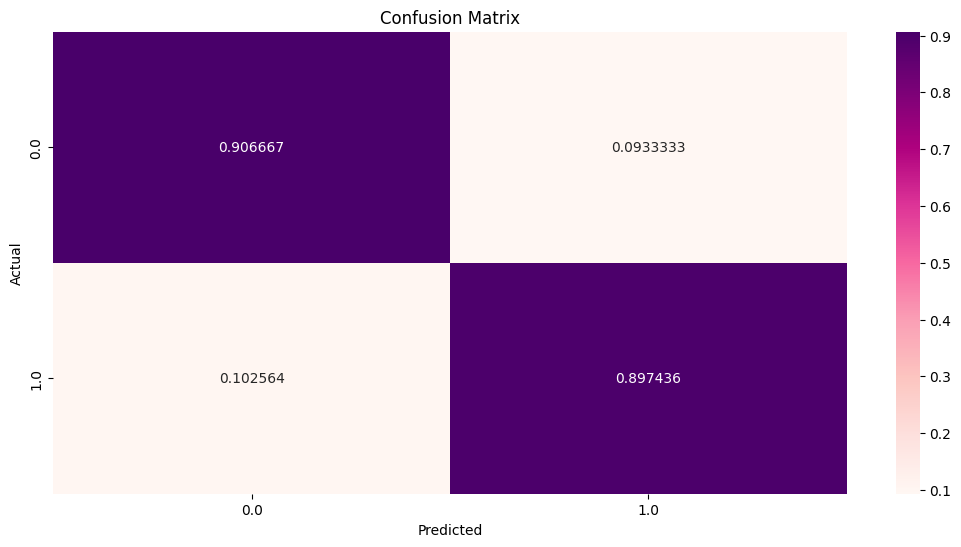

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_confusion_matrix(actual_classes : np.array, predicted_classes : np.array, sorted_labels : list):

    matrix = confusion_matrix(actual_classes, predicted_classes, labels=sorted_labels)
    matrix= matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(12.8,6))
    sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="RdPu", fmt="g")
    plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')

    plt.show()

model.Train(X_train, y_train)
y_predict = model.Predict(X_test)
plot_confusion_matrix(y_test, y_predict, [0.0, 1.])